How location affects price

How number of bedrooms affects price

How number of bathrooms affects price

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
apartments = pd.read_csv("apartments.csv")
apartments.head()

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi",3,3,200 000,Per Month
1,1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",3,4,70 000,Per Month
2,2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa",3,2,38 000,Per Month
3,3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi",3,3,80 000,Per Month
4,4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi",1,1,110 000,Per Month


In [4]:
apartments.columns

Index(['Unnamed: 0', 'title', 'location', 'bedrooms', 'bathrooms', 'price',
       'rate'],
      dtype='object')

In [5]:
apartments = apartments.drop(columns='Unnamed: 0')

In [6]:
apartments.dtypes

title        object
location     object
bedrooms      int64
bathrooms     int64
price        object
rate         object
dtype: object

In [7]:
apartments['price'] = apartments['price'].str.replace(' ', '')
apartments['price'] = apartments['price'].astype(int)

In [13]:
apartments.shape

(2520, 6)

In [14]:
apartments.nunique(axis=0)

title        18
location     17
bedrooms      4
bathrooms     5
price        16
rate          2
dtype: int64

In [8]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      2520 non-null   object
 1   location   2144 non-null   object
 2   bedrooms   2520 non-null   int64 
 3   bathrooms  2520 non-null   int64 
 4   price      2520 non-null   int64 
 5   rate       2520 non-null   object
dtypes: int64(3), object(3)
memory usage: 118.2+ KB


In [11]:
apartments.isna().sum()

title          0
location     376
bedrooms       0
bathrooms      0
price          0
rate           0
dtype: int64

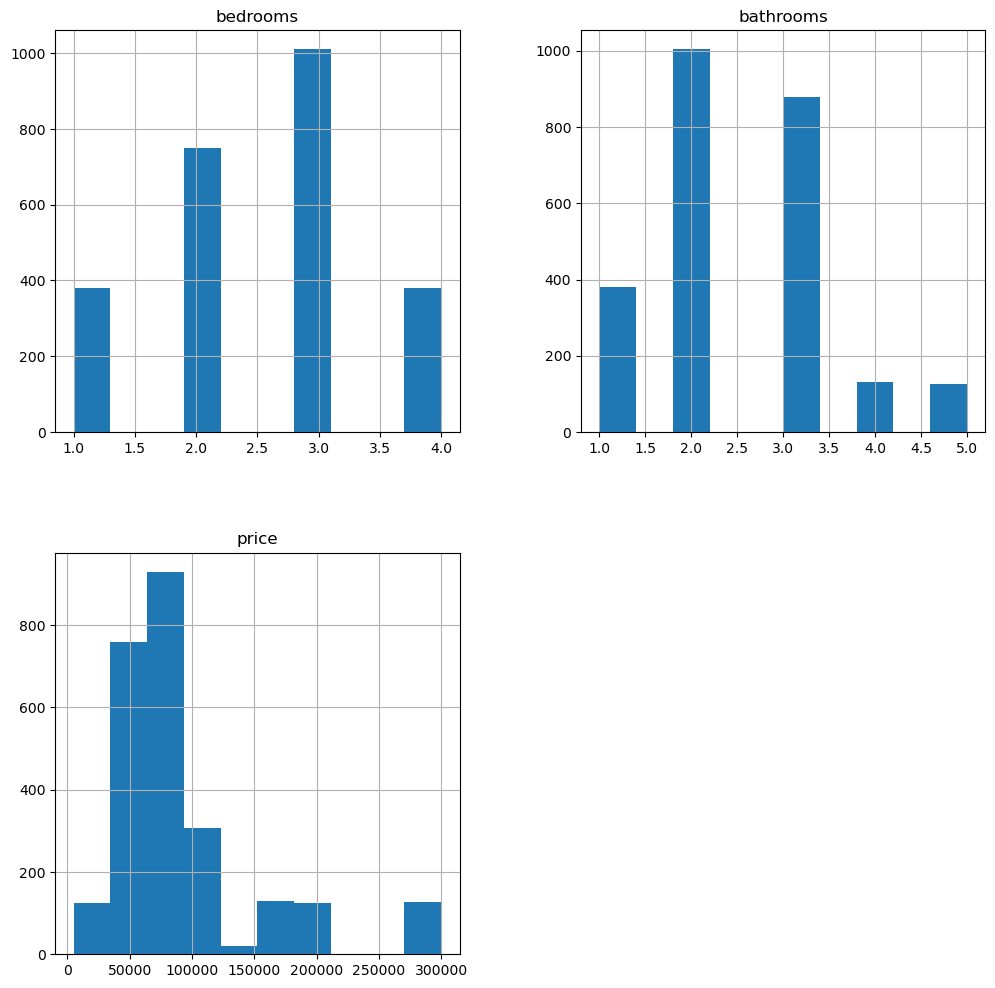

In [15]:
hist = apartments.hist(figsize=(12,12))

In [17]:
apartments['title'].value_counts()

3 Bedroom Apartment / Flat to rent in Nyali             252
2 Bedroom Apartment / Flat to rent in Westlands         250
3 Bedroom Apartment / Flat to rent in Kileleshwa        186
3 Bedroom Apartment / Flat to rent in Kilimani          137
1 Bedroom Apartment / Flat to rent in Shanzu            129
4 Bedroom Apartment / Flat to rent in Westlands         129
3 Bedroom Apartment / Flat to rent in Kikuyu            128
1 Bedroom Apartment / Flat to rent in Kileleshwa        127
3 Bedroom Apartment / Flat to rent in Westlands         127
4 Bedroom Apartment / Flat to rent in Muthaiga          126
2 Bedroom Apartment / Flat to rent in Kilimani          126
2 Bedroom Apartment / Flat to rent in Kileleshwa        125
3 Bedroom Apartment / Flat to rent in Riverside         125
1 Bedroom Apartment / Flat to rent in Nyali             125
4 Bedroom Apartment / Flat to rent in Kahawa Wendani    125
2 Bedroom Apartment / Flat to rent in Spring Valley     125
2 Bedroom Apartment / Flat to rent in Hu

In [18]:
apartments['location'].value_counts()

Kileleshwa, Nairobi                                      257
Westlands, Nairobi                                       252
Kilimani, Nairobi                                        251
Shanzu, Mombasa                                          129
Kikuyu Town Bus park Kikuyu, Kikuyu, Kikuyu              128
Westlands downtown, Westlands, Nairobi                   127
Links Rd Mombasa, Nyali, Mombasa                         126
Muthaiga, Nairobi                                        126
Grevillea Grove Spring Valley, Spring Valley, Nairobi    125
Kileleshwa Nairobi, Kileleshwa, Nairobi                  125
Riverside Dr Nairobi, Riverside, Nairobi                 125
Nyali, Mombasa                                           125
Thika Rd Nairobi, Kahawa Wendani, Nairobi                125
Vihiga road, Kileleshwa, Nairobi                          56
Near Valley Arcade, Lavington, Nairobi                    35
Off Othaya road, Lavington, Nairobi                       20
Jabavu court, Kilimani, 

In [19]:
apartments['rate'].value_counts()

Per Month    2395
Per Day       125
Name: rate, dtype: int64

Convert rate to common unit eg month. So for those columns with per day, we'll multiply price by 30.

Extract city/town from location.
Extract neighborhood from title.

In [25]:
apartments[['title', 'location']]

,title,location
0,3 Bedroom Apartment / Flat to rent in Riverside,"Riverside Dr Nairobi, Riverside, Nairobi"
1,3 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi"
2,3 Bedroom Apartment / Flat to rent in Nyali,"Links Rd Mombasa, Nyali, Mombasa"
3,3 Bedroom Apartment / Flat to rent in Lavington,"Near Valley Arcade, Lavington, Nairobi"
4,1 Bedroom Apartment / Flat to rent in Kileleshwa,"Kileleshwa, Nairobi"
...,...,...
2515,3 Bedroom Apartment / Flat to rent in Kilimani,"Kilimani, Nairobi"
2516,3 Bedroom Apartment / Flat to rent in Nyali,NaN
2517,2 Bedroom Apartment / Flat to rent in Spring V...,"Grevillea Grove Spring Valley, Spring Valley, ..."
2518,4 Bedroom Apartment / Flat to rent in Muthaiga,"Muthaiga, Nairobi"


In [33]:
apartments['title'] = apartments['title'].str.extract(r'\b(\w+)$', expand=True)
apartments['title'].value_counts()

Westlands     506
Kileleshwa    438
Nyali         377
Kilimani      263
Shanzu        129
Kikuyu        128
Muthaiga      126
Riverside     125
Wendani       125
Valley        125
Hurlingham    123
Lavington      55
Name: title, dtype: int64

In [35]:
apartments['location'] = apartments['location'].str.extract(r'\b(\w+)$', expand=True)
apartments['location'].value_counts()

Nairobi    1636
Mombasa     380
Kikuyu      128
Name: location, dtype: int64

In [37]:
apartments = apartments.rename(columns={"title": "neighborhood", "location": "city"})
apartments

,neighborhood,city,bedrooms,bathrooms,price,rate
0,Riverside,Nairobi,3,3,200000,Per Month
1,Kileleshwa,Nairobi,3,4,70000,Per Month
2,Nyali,Mombasa,3,2,38000,Per Month
3,Lavington,Nairobi,3,3,80000,Per Month
4,Kileleshwa,Nairobi,1,1,110000,Per Month
...,...,...,...,...,...,...
2515,Kilimani,Nairobi,3,3,75000,Per Month
2516,Nyali,NaN,3,2,45000,Per Month
2517,Valley,Nairobi,2,3,65000,Per Month
2518,Muthaiga,Nairobi,4,5,300000,Per Month


In [39]:
apartments[apartments['city'].isna()]

,neighborhood,city,bedrooms,bathrooms,price,rate
7,Westlands,NaN,3,3,78000,Per Month
15,Hurlingham,NaN,2,2,75000,Per Month
18,Nyali,NaN,3,2,45000,Per Month
29,Westlands,NaN,3,3,78000,Per Month
36,Hurlingham,NaN,2,2,75000,Per Month
...,...,...,...,...,...,...
2493,Hurlingham,NaN,2,2,75000,Per Month
2496,Nyali,NaN,3,2,45000,Per Month
2506,Westlands,NaN,3,3,78000,Per Month
2513,Hurlingham,NaN,2,2,75000,Per Month


In [40]:
apartments_copy = apartments.copy()

In [41]:
apartments_copy['city'].loc[apartments_copy['city'].isnull()] = apartments_copy['neighborhood']


/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_91387/4292603493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apartments_copy['city'].loc[apartments_copy['city'].isnull()] = apartments_copy['neighborhood']


In [43]:
apartments_copy.isna().sum()

neighborhood    0
city            0
bedrooms        0
bathrooms       0
price           0
rate            0
dtype: int64

In [44]:
apartments_copy.head()

,neighborhood,city,bedrooms,bathrooms,price,rate
0,Riverside,Nairobi,3,3,200000,Per Month
1,Kileleshwa,Nairobi,3,4,70000,Per Month
2,Nyali,Mombasa,3,2,38000,Per Month
3,Lavington,Nairobi,3,3,80000,Per Month
4,Kileleshwa,Nairobi,1,1,110000,Per Month


In [55]:
fig = px.histogram(apartments_copy, x="neighborhood", color="neighborhood")
fig.show()

In [57]:
fig = px.histogram(apartments_copy, x="city", color="city")
fig.show()

In [60]:
apartments_copy['city'].loc[apartments_copy['city'] == "Hurlingham"] = "Nairobi"
apartments_copy['city'].loc[apartments_copy['city'] == "Westlands"] = "Nairobi"
apartments_copy['city'].loc[apartments_copy['city'] == "Nyali"] = "Mombasa"

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_91387/2164543141.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_91387/2164543141.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/2v/hvrlqwt12qdfm0y3wzxt7fgc0000gp/T/ipykernel_91387/2164543141.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
fig = px.histogram(apartments_copy, x="city", color="city")
fig.show()

In [63]:
apartments_copy['bedrooms'].describe()

count    2520.000000
mean        2.551190
std         0.922868
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: bedrooms, dtype: float64

In [64]:
apartments_copy['bathrooms'].describe()

count    2520.000000
mean        2.450794
std         0.976480
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: bathrooms, dtype: float64

In [65]:
apartments_copy['price'].describe()

count      2520.000000
mean      89274.900794
std       63943.997415
min        5000.000000
25%       55000.000000
50%       70000.000000
75%      100000.000000
max      300000.000000
Name: price, dtype: float64

In [67]:
apartments_copy.dtypes

neighborhood    object
city            object
bedrooms         int64
bathrooms        int64
price            int64
rate            object
dtype: object

In [70]:
corr = apartments_copy.corr()
corr

,bedrooms,bathrooms,price
bedrooms,1.000000,0.616225,0.468572
bathrooms,0.616225,1.000000,0.559424
price,0.468572,0.559424,1.000000


<AxesSubplot:>

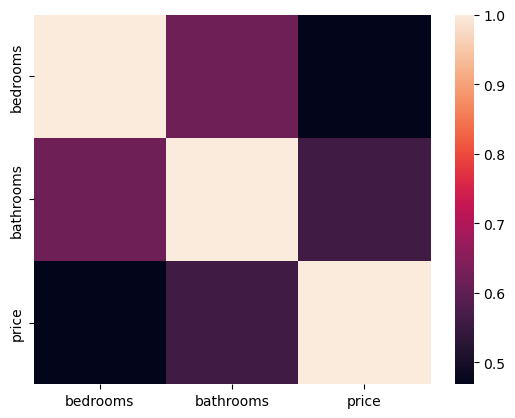

In [71]:
sns.heatmap(corr)

In [77]:
fig = px.scatter(data_frame=apartments_copy, x=apartments_copy['bedrooms'], y=apartments_copy['price'], trendline="ols")
fig.show()

In [76]:
fig = px.scatter(data_frame=apartments_copy, x=apartments_copy['bathrooms'], y=apartments_copy['price'], trendline="ols")
fig.show()

In [78]:
apartments_copy.to_csv("apartments_cleaned.csv", index=False)